In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
train_df = pd.read_csv('../input/train.csv', index_col='Id')
test_df = pd.read_csv('../input/test.csv', index_col='Id')

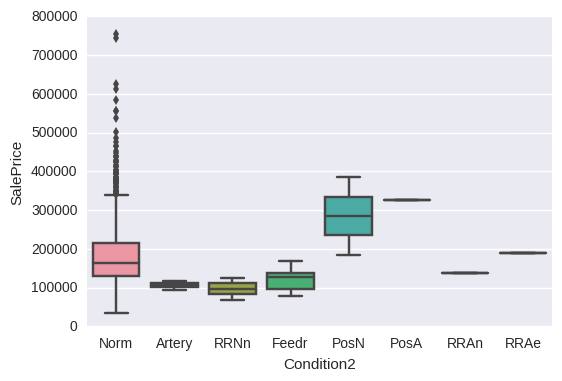

In [61]:
sns.boxplot(x='Condition2', y='SalePrice', data=train_df)

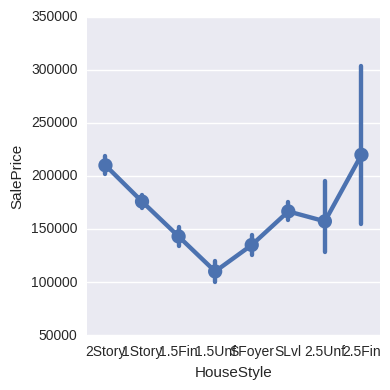

In [62]:
sns.factorplot(x='HouseStyle', y='SalePrice', data=train_df)

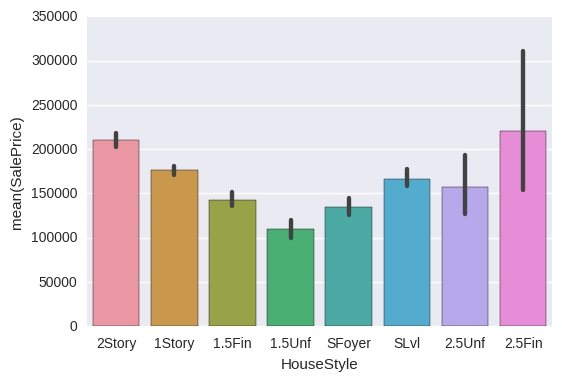

In [63]:
sns.barplot(x='HouseStyle', y='SalePrice', data=train_df)

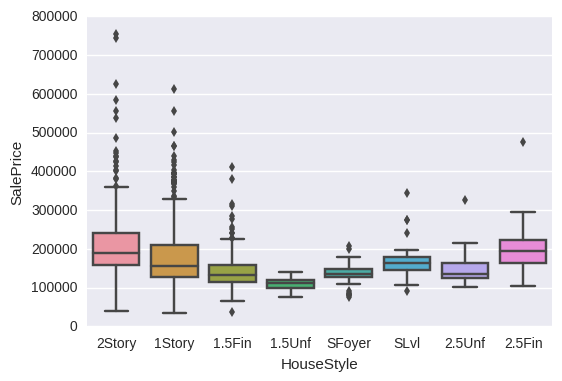

In [64]:
sns.boxplot(x='HouseStyle', y='SalePrice', data=train_df)

In [65]:
train_df[train_df.HouseStyle == '2Story']['2ndFlrSF'].mean()

880.2606741573034

In [66]:
flrArea = train_df['1stFlrSF'] + train_df['2ndFlrSF']

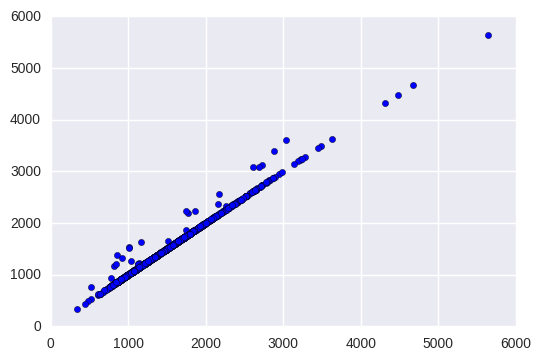

In [67]:
plt.scatter(flrArea, train_df.GrLivArea)

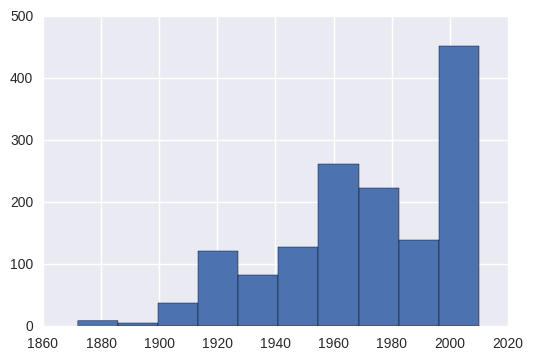

In [68]:
train_df.YearBuilt.hist()

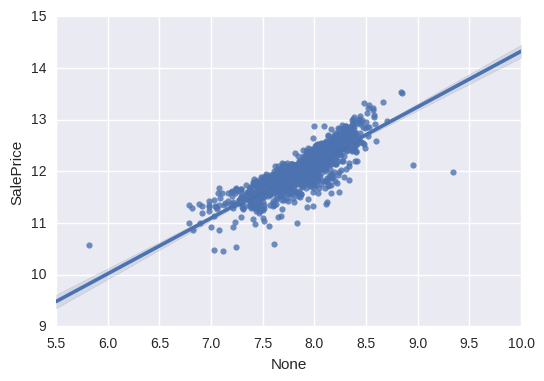

In [69]:
sns.regplot(np.log1p(flrArea + 0.7 * train_df.TotalBsmtSF + train_df.GarageArea), np.log1p(train_df.SalePrice))

In [28]:
from scipy.stats import pearsonr
rate = np.arange(0.1, 1.1, 0.1)
#print [(r, pearsonr(train_df.GrLivArea + r * train_df.TotalBsmtSF, train_df.SalePrice)[0]) for r in rate]
[(r, pearsonr(flrArea + r * train_df.TotalBsmtSF + train_df.GarageArea, np.log1p(train_df.SalePrice))[0]) for r in rate]

[(0.10000000000000001, 0.79377901104861415),
 (0.20000000000000001, 0.80246446294014162),
 (0.30000000000000004, 0.80863396648539276),
 (0.40000000000000002, 0.81272373462868097),
 (0.5, 0.8151167649693567),
 (0.59999999999999998, 0.81614156735916676),
 (0.70000000000000007, 0.81607497386563044),
 (0.80000000000000004, 0.81514713272947714),
 (0.90000000000000002, 0.81354739163455436),
 (1.0, 0.81143026155580433)]

In [29]:
from itertools import product
[(i, pearsonr(np.log1p(flrArea + i * train_df.TotalBsmtSF + train_df.GarageArea), np.log1p(train_df.SalePrice))[0]) for i in np.arange(0, 1.1, 0.1)]
    

[(0.0, 0.79696127609032896),
 (0.10000000000000001, 0.81041977997768466),
 (0.20000000000000001, 0.82084105757267467),
 (0.30000000000000004, 0.82861422538809315),
 (0.40000000000000002, 0.83411081283407562),
 (0.5, 0.83767442878977449),
 (0.60000000000000009, 0.83961499705656994),
 (0.70000000000000007, 0.84020656495751223),
 (0.80000000000000004, 0.8396876527418492),
 (0.90000000000000002, 0.8382632434522943),
 (1.0, 0.83610770632629317)]

In [36]:
object_feats = train_df.dtypes[train_df.dtypes == object].index
train_df[object_feats] = train_df[object_feats].fillna('NA')

In [37]:
grade = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0}
train_qual = train_qual.apply(lambda x : x.map(grade))
train_cond = train_cond.apply(lambda x : x.map(grade))

NameError: name 'train_qual' is not defined

In [ ]:
cond_qual = train_qual.join(train_cond).join(train_df.OverallCond).join(train_df.OverallQual)

In [92]:
train_df.describe()

/usr/local/Anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
train_df[train_df.GrLivArea > 4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [104]:
train_df.iloc[10].SalePrice

129500